In [37]:
import requests
import bs4
import csv

In [38]:
from bs4 import BeautifulSoup

In [39]:
r=requests.get('https://www.qidian.com/rank/fin')

In [104]:
def get_the_page(url):
    r=requests.get(url)
    mypage=BeautifulSoup(r.text)
    information=mypage.find_all('div', attrs={'class': 'book-mid-info'})
    name=[]
    writer=[]
    time=[]
    genre=[]
    intro=[]
    for i in range(0,20):
        name.append(information[i].find('h4').text.strip())
        writer.append(information[i].find('a', attrs={'class': 'name'}).text.strip())
        time1=information[i].find('p', attrs={'class': 'update'})
        time.append(time1.find_all('span')[0].text.strip())
        genre1=information[i].find('p', attrs={'class':'author'})
        genre.append(genre1.find_all('a')[1].text.strip())
        intro.append(information[i].find('p', attrs={'class':'intro'}).text.strip())

    my_first_page=[]
    for i in range(0,20):
        my_first_page.append([name[i],writer[i],genre[i],time[i],intro[i],])
    return my_first_page

In [105]:
pages=[]
for q in range(1,26):
    pagenumber=str(q)
    myurl="https://www.qidian.com/rank/fin?dateType=3&chn=-1&page="+pagenumber
    pages.extend(get_the_page(myurl))

pages

/Users/mac/venv/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /Users/mac/anaconda3/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


[['吞噬星空',
  '我吃西红柿',
  '科幻',
  '2017-09-21 10:17',
  '继《九鼎记》《盘龙》《星辰变》《寸芒》《星峰传说》后，番茄的第六本书！——————简介：星空中。“这颗星球，通体土黄色，没有任何生命存在，直径21000公里，咦，竟然蕴含‘星泪金’'],
 ['异常生物见闻录',
  '远瞳',
  '科幻',
  '2018-04-10 16:38',
  '郝仁，人如其名，是个好人，理想是平平安安过一辈子，当个穷不死但也发不了财的小房东——起码在他家里住进去一堆神经病生物之前是这样。一栋偏僻陈旧的大屋，一堆不怎么正常的人外生物，还有一'],
 ['遮天',
  '辰东',
  '仙侠',
  '2016-11-01 14:00',
  '冰冷与黑暗并存的宇宙深处，九具庞大的龙尸拉着一口青铜古棺，亘古长存。这是太空探测器在枯寂的宇宙中捕捉到的一幅极其震撼的画面。九龙拉棺，究竟是回到了上古，还是来到了星空的彼岸？一个浩'],
 ['凡人修仙传',
  '忘语',
  '仙侠',
  '2016-01-05 17:02',
  '一个普通山村小子，偶然下进入到当地江湖小门派，成了一名记名弟子。他以这样身份，如何在门派中立足,如何以平庸的资质进入到修仙者的行列，从而笑傲三界之中！续篇《凡人修仙之仙界篇》已经在'],
 ['重生之财源滚滚',
  '老鹰吃小鸡',
  '都市',
  '2018-05-04 23:06',
  '当重生成为一种潮流，李东也幸运地赶上了重生的马车。上辈子遗憾太多，这辈子且让他一一弥补！看小人物重回2004，亲情爱情双丰收，发家致富两不误！（读者群:250605308，全订群号'],
 ['武动乾坤',
  '天蚕土豆',
  '玄幻',
  '2013-07-03 11:18',
  '修炼一途，乃窃阴阳，夺造化，转涅盘，握生死，掌轮回。武之极，破苍穹，动乾坤！'],
 ['将夜', '猫腻', '玄幻', '2014-05-04 21:57', '与天斗，其乐无穷。'],
 ['全职高手',
  '蝴蝶蓝',
  '游戏',
  '2014-04-30 01:05',
  '网游荣耀中被誉为教科书级别的顶尖高手，因为种种原因遭到俱乐部的驱逐，离开职业圈的他寄身于一家网吧成了一个小小的网管，但是，拥有

In [106]:
import csv
with open('Yy.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',',
                            quotechar='"', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerows(pages)

In [107]:
import pandas as pd
import numpy as np
from dateutil.parser import parse
import seaborn as sns
from matplotlib import pyplot as plt

In [123]:
df=pd.read_csv('Yy.csv',header=None,names=['name','writer','genre','time','intro'])
df.head()

,name,writer,genre,time,intro
0,吞噬星空,我吃西红柿,科幻,2017-09-21 10:17,继《九鼎记》《盘龙》《星辰变》《寸芒》《星峰传说》后，番茄的第六本书！——————简介：星空...
1,异常生物见闻录,远瞳,科幻,2018-04-10 16:38,郝仁，人如其名，是个好人，理想是平平安安过一辈子，当个穷不死但也发不了财的小房东——起码在他...
2,遮天,辰东,仙侠,2016-11-01 14:00,冰冷与黑暗并存的宇宙深处，九具庞大的龙尸拉着一口青铜古棺，亘古长存。这是太空探测器在枯寂的宇...
3,凡人修仙传,忘语,仙侠,2016-01-05 17:02,一个普通山村小子，偶然下进入到当地江湖小门派，成了一名记名弟子。他以这样身份，如何在门派中立...
4,重生之财源滚滚,老鹰吃小鸡,都市,2018-05-04 23:06,当重生成为一种潮流，李东也幸运地赶上了重生的马车。上辈子遗憾太多，这辈子且让他一一弥补！看小...


In [125]:
df['genre'].value_counts()

都市     131
玄幻      89
历史      73
仙侠      69
科幻      60
游戏      37
奇幻      11
体育      10
军事       8
二次元      8
武侠       3
灵异       1
Name: genre, dtype: int64

In [126]:
from palettable.colorbrewer.qualitative import Paired_12
import brewer2mpl

In [127]:
bmap = brewer2mpl.get_map('Paired', 'qualitative', 12)
colors = bmap.mpl_colors
import matplotlib as mpl
import numpy as np

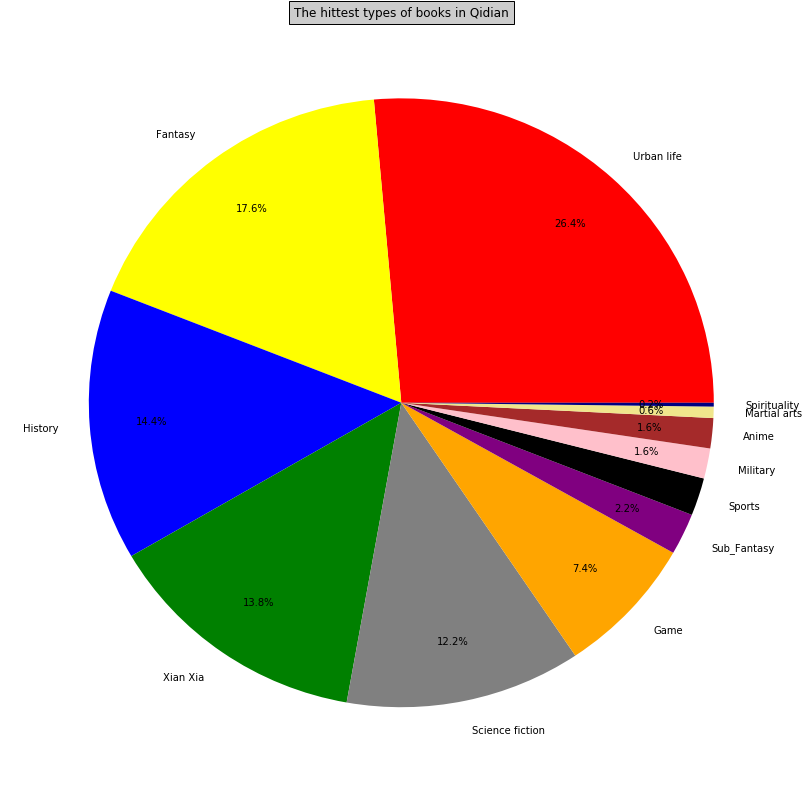

In [128]:
# -*- coding: utf-8 -*-
def draw_pie(labels,quants):
    plt.figure(1,figsize=(14,14))
    colors = ["red","yellow","blue","green","gray","orange","purple","black","pink","brown","khaki","navy"]
    plt.pie(quants,colors=colors, labels=labels, autopct='%1.1f%%',pctdistance=0.8, shadow=False)
    plt.title('The hittest types of books in Qidian', bbox={'facecolor':'0.8', 'pad':5})  
    plt.show()  
    plt.savefig("pie.jpg")  
    plt.close()  
labels = ['Urban life','Fantasy','History','Xian Xia','Science fiction','Game','Sub_Fantasy','Sports','Military','Anime','Martial arts','Spirituality']
quants = [132,88,72,69,61,37,11,10,8,8,3,1]
draw_pie(labels,quants)

## What's the most popular topic of internet novels?

I grabbed the information of top 500 finished internet novels on the basis of their click rates on qidian zhong wen wang(起点中文网). After the analysis of their topic, we can find out which type of books readers tend to read on the Internet. Then, I got a pie graph. 

We could see from the graph that the red part, which represents novel about urban life is the most popular one in today's Internet novel market. After urban life are novels about fantasy, history, Xian Xia. And least people write about spiritual themes.

In [152]:
from datetime import datetime
import time
import copy

In [159]:
df['time']

0      2017-09-21 10:17
1      2018-04-10 16:38
2      2016-11-01 14:00
3      2016-01-05 17:02
4      2018-05-04 23:06
5      2013-07-03 11:18
6      2014-05-04 21:57
7      2014-04-30 01:05
8      2017-09-21 10:16
9      2012-01-08 17:17
10     2018-04-01 12:37
11     2018-02-22 16:09
12     2016-11-01 13:56
13     2015-11-20 10:50
14     2011-11-06 23:18
15     2018-05-09 08:00
16     2011-11-21 21:46
17     2017-12-25 18:55
18     2018-04-29 00:23
19     2017-07-08 20:49
20     2016-04-10 21:20
21     2018-04-01 20:40
22     2018-05-02 16:13
23     2015-12-12 16:22
24     2018-03-09 09:53
25     2018-02-22 22:58
26     2017-11-28 02:38
27     2017-08-23 12:07
28     2018-04-01 12:40
29     2018-04-03 20:52
             ...       
470    2018-03-15 20:53
471    2016-06-07 00:33
472    2013-01-29 16:00
473    2011-12-18 18:57
474    2017-04-08 16:04
475    2011-08-06 19:39
476    2012-12-03 19:55
477    2014-12-30 11:34
478    2015-07-15 00:04
479    2018-04-19 15:54
480    2017-05-0

In [160]:
df['time'].min()

'2009-01-03 22:18'

In [161]:
df['time'].max()

'2018-05-13 21:25'

In [175]:
df['time'] = pd.to_datetime(df['time'])
df.head()

,name,writer,genre,time,intro
0,吞噬星空,我吃西红柿,科幻,2017-09-21 10:17:00,继《九鼎记》《盘龙》《星辰变》《寸芒》《星峰传说》后，番茄的第六本书！——————简介：星空...
1,异常生物见闻录,远瞳,科幻,2018-04-10 16:38:00,郝仁，人如其名，是个好人，理想是平平安安过一辈子，当个穷不死但也发不了财的小房东——起码在他...
2,遮天,辰东,仙侠,2016-11-01 14:00:00,冰冷与黑暗并存的宇宙深处，九具庞大的龙尸拉着一口青铜古棺，亘古长存。这是太空探测器在枯寂的宇...
3,凡人修仙传,忘语,仙侠,2016-01-05 17:02:00,一个普通山村小子，偶然下进入到当地江湖小门派，成了一名记名弟子。他以这样身份，如何在门派中立...
4,重生之财源滚滚,老鹰吃小鸡,都市,2018-05-04 23:06:00,当重生成为一种潮流，李东也幸运地赶上了重生的马车。上辈子遗憾太多，这辈子且让他一一弥补！看小...


In [174]:
df['time'].groupby([df.time.dt.year]).agg('count')

time
2009      3
2010      2
2011     44
2012     66
2013     50
2014     23
2015     38
2016     63
2017     85
2018    126
Name: time, dtype: int64

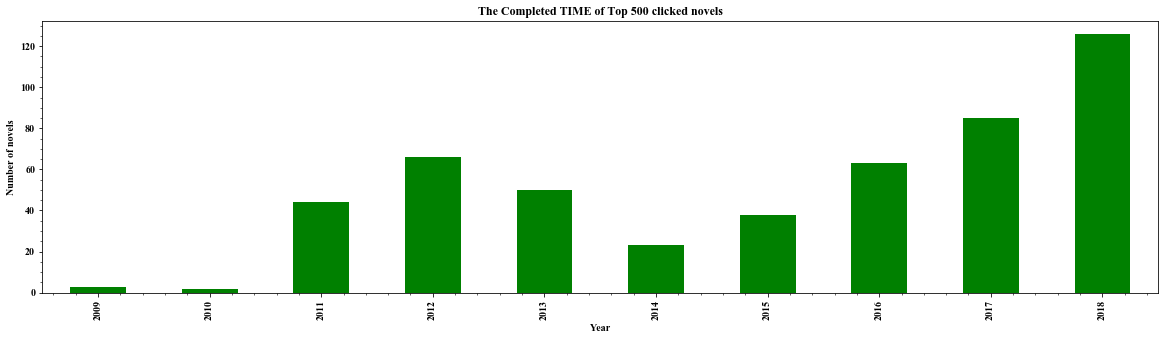

In [190]:
df_update = df['time'].groupby([df.time.dt.year]).agg('count')
df_update.plot(kind='bar', linewidth=2, figsize=(20,5), color='green')

plt.ylabel('Number of novels')
plt.xlabel('Year')
plt.title('The Completed TIME of Top 500 clicked novels')
plt.minorticks_on()

## When did most popular novels complete?

As we can see from the graph, the top 500 popular novels completed between 2009-2018. 2009 and 2010 were the budding period of online novels is not very high in quality and quantity. When time come to 2012, the number reached about 70 but fell down to 50 in 2013. From 2014 to 2018, the number increased steadily, representing the network fiction market was gradually maturing.



